# Assignment : Dimensionality Reduction

# Introduction

1. Customer Personality Analysis involves a comprehensive examination of a company's ideal customers. This analysis enables businesses to gain deeper insights into their customers, allowing them to tailor products to meet the specific needs, behaviors, and concerns of various customer segments.

<center><img src="https://media.licdn.com/dms/image/D5605AQFw8OHV-lz5RA/feedshare-thumbnail_720_1280/0/1685620551936?e=2147483647&v=beta&t=fCdsvBAlHWLZBV3BwV1vhDR9IzUeaLGQN-le1nzj9-k" width=500/></center>

2. By conducting Customer Personality Analysis, businesses can effectively modify their products to align with the preferences of their target audience across different segments. For instance, instead of spending resources on marketing a new product to every customer in their database, a company can identify which customer segment is most likely to purchase the product and focus their marketing efforts specifically on that group.

  [Dataset](https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis/data)

# STEP 1: Import the necessary Libraries

In [9]:
# Importing necessary libraries
import numpy as np  # For numerical operations
import pandas as pd  # For data manipulation and analysis
import seaborn as sns  # For statistical data visualization
import matplotlib.pyplot as plt  # For creating static, interactive, and animated visualizations
from sklearn.preprocessing import StandardScaler  # For standardizing features by removing the mean and scaling to unit variance

# To ignore warnings
import warnings
warnings.filterwarnings("ignore")

# STEP 2: Loading the Data


### Dataset Information:
* `ID`: Unique identifier for each customer.

* `Year_Birth`: The year the customer was born.

* `Education`: The highest level of education attained by the customer (e.g., Graduation, Master, PhD).

* `Marital_Status`: The current marital status of the customer (e.g., Single, Married, Together, Divorced).

* `Income`: The annual income of the customer.

* `Kidhome`: The number of children living at home with the customer.

* `Teenhome`: The number of teenagers living at home with the customer.

* `Dt_Customer`: The date when the customer registered with the company.

* `Recency`: The number of days since the customer last made a purchase.

* `MntWines`: The amount of money spent on wine by the customer.

* `NumWebVisitsMonth`: The number of times the customer visited the company's website in the last month.

* `AcceptedCmp1`: Indicator of whether the customer accepted the first marketing campaign (0 = No, 1 = Yes).

* `AcceptedCmp2`: Indicator of whether the customer accepted the second marketing campaign (0 = No, 1 = Yes).

* `AcceptedCmp3`: Indicator of whether the customer accepted the third marketing campaign (0 = No, 1 = Yes).

* `AcceptedCmp4`: Indicator of whether the customer accepted the fourth marketing campaign (0 = No, 1 = Yes).

* `AcceptedCmp5`: Indicator of whether the customer accepted the fifth marketing campaign (0 = No, 1 = Yes).

* `Complain`: Indicator of whether the customer has lodged a complaint (0 = No, 1 = Yes).

* `Z_CostContact`: The cost associated with contacting the customer.

* `Z_Revenue`: The revenue generated from the customer.

* `Response`: Indicator of whether the customer responded to the last marketing campaign (0 = No, 1 = Yes).

### 2.1 Load the dataset, set columns to display 30, and view it
* Identify the type of values (numerical, categorical, or any format) present in the columns.

In [10]:
# Load the dataset
df = pd.read_csv("marketing_campaign.csv", sep="\t")

# Set the maximum number of columns to display to 30
pd.set_option('display.max_columns', 30)

# Display the first 5 rows
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


### 2.2 View the columns of the data and understand them

In [11]:
# Display all column names in the DataFrame
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

### 2.3 Check the shape of the dataset

In [12]:
# Get the shape of the DataFrame
df.shape

(2240, 29)


### 2.4 Understand the datatypes of each of the columns

In [13]:
# Get a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

### Interpretation:
The dataset contains columns with `int64`, `object`, and `float64` data types. Additionally, the non-null counts for the columns are
exactly same with the total length of the DataFrame, indicating the non-presence of null values.

### 2.5 Generate Descriptive Statistics

In [14]:
# Generate descriptive statistics for numeric columns
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


### Interpretation:
* The column Income has an extreme value (666666) that can be considered an outlier, too far from the average and median. Such outliers can skew statistical analyses, leading to misleading conclusions about the dataset's characteristics.
* By capping the income at 600,000, we ensure a more representative dataset that reflects realistic income distributions, thus improving the integrity of our analysis.

*Note: Generally, the outlier threshold is set by experts within the company. For the analysis purpose, you may choose any upper threshold value.*



* The minimum year of birth in the dataset is 1893, while the 25th percentile is 1959.
* To set a reasonable lower age limit, you can selected 1940.(You may choose any relevant year for your analysis.)
* This threshold accounts for the aging population, ensuring that the dataset reflects a relevant age range for analysis.
* By excluding individuals born before 1940, we can focus on customers who are more likely to engage with modern products and services, enhancing the relevance of our analysis in understanding current consumer behavior.

### 2.6 Handling outliers

### 2.6.1 Remove outliers based on the "Income" column where the income is greater than 600,000.

Then, display the total number of data points remaining after the removal of these outliers.

In [15]:
# Filter the dataset to remove rows where "Income" is greater than 600,000
df = df[(df["Income"] < 600000)]

# Print the total number of data points remaining after outlier removal
print("The total number of data-points after removing the outliers are:", len(df))


The total number of data-points after removing the outliers are: 2215


### 2.6.2 Removing the rows where Year_Birth is lower than 1940

In [16]:
# Keep only rows where 'Year_Birth' is 1940 or later
df = df[df['Year_Birth'] >= 1940]

# Print the total number of data points remaining after outlier removal
print("The total number of data-points after removing the outliers are:", len(df))

The total number of data-points after removing the outliers are: 2212


### 2.7 Check the Null values

In [17]:
# Use isna() to check the null values
df.isna().sum()

,0
ID,0
Year_Birth,0
Education,0
Marital_Status,0
Income,0
Kidhome,0
Teenhome,0
Dt_Customer,0
Recency,0
MntWines,0


### Observation:
The dataset contains no null values.

### 2.8 Check for duplicate values

In [18]:
# Check for duplicate values
df.duplicated().sum()

0

### Observation:
The dataset contains no duplicated rows.

### 2.9 Check the number of unique type of values in the each column.(Hint: Use nunique())

In [19]:
# Count of unique types in each column
for i in df.columns:
    print(f'{i}: {df[i].nunique()}')


ID: 2212
Year_Birth: 56
Education: 5
Marital_Status: 8
Income: 1970
Kidhome: 3
Teenhome: 3
Dt_Customer: 662
Recency: 100
MntWines: 775
MntFruits: 158
MntMeatProducts: 553
MntFishProducts: 182
MntSweetProducts: 176
MntGoldProds: 212
NumDealsPurchases: 15
NumWebPurchases: 15
NumCatalogPurchases: 14
NumStorePurchases: 14
NumWebVisitsMonth: 16
AcceptedCmp3: 2
AcceptedCmp4: 2
AcceptedCmp5: 2
AcceptedCmp1: 2
AcceptedCmp2: 2
Complain: 2
Z_CostContact: 1
Z_Revenue: 1
Response: 2


### 2.10 Drop the `ID` and `Dt_Customer` columns as they are not much useful for the clustering.

In [20]:
# Drop ID, Dt_Customer columns
df.drop(columns = ["ID","Dt_Customer"], inplace = True)

## STEP 3: Exploratory Data Analysis(EDA)

### 3.1 Create the histograms for all the numeric features

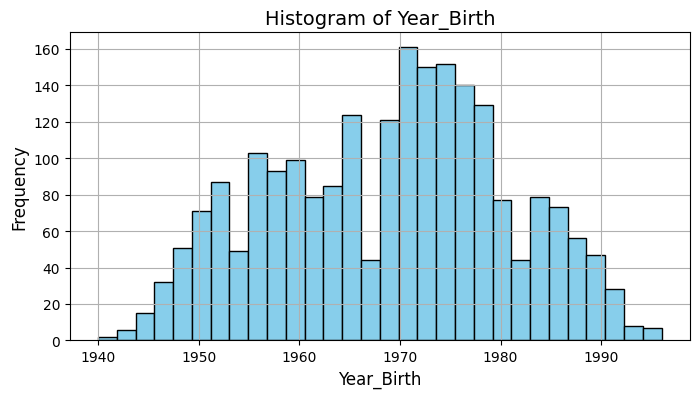

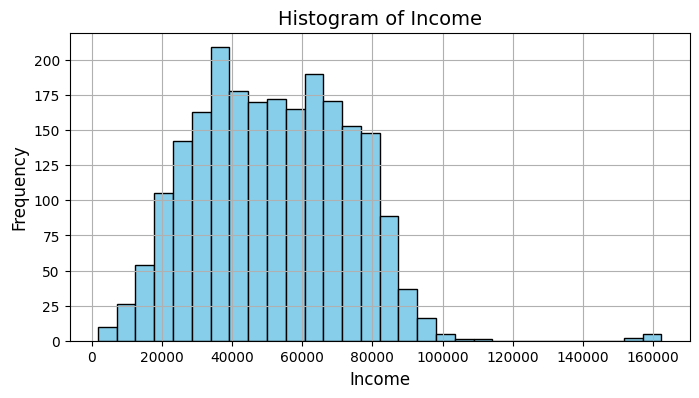

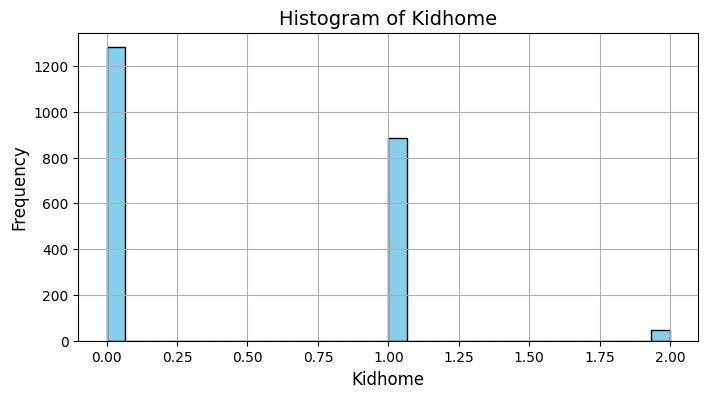

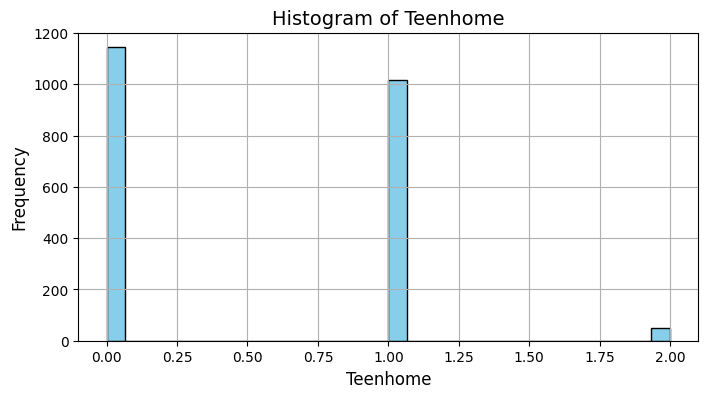

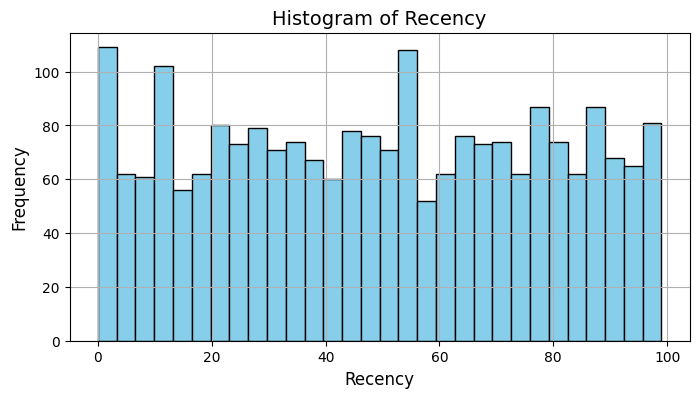

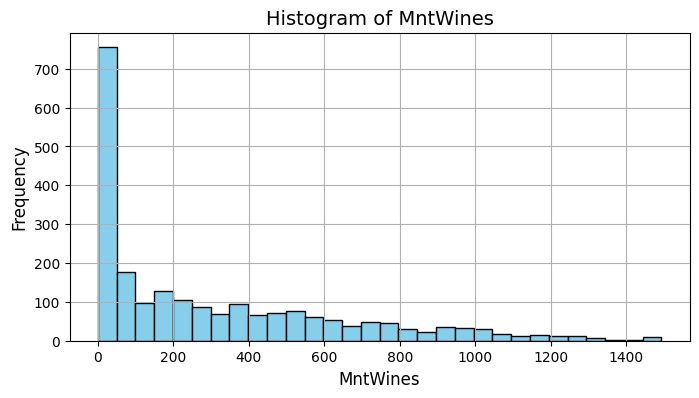

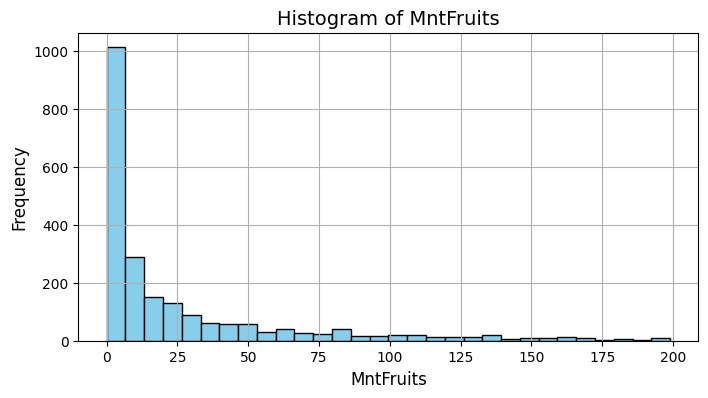

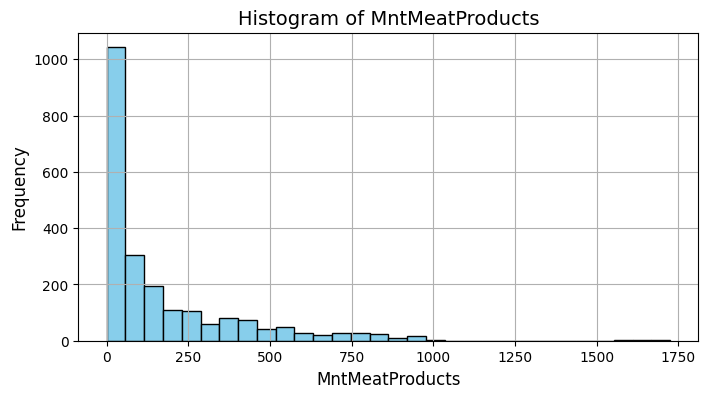

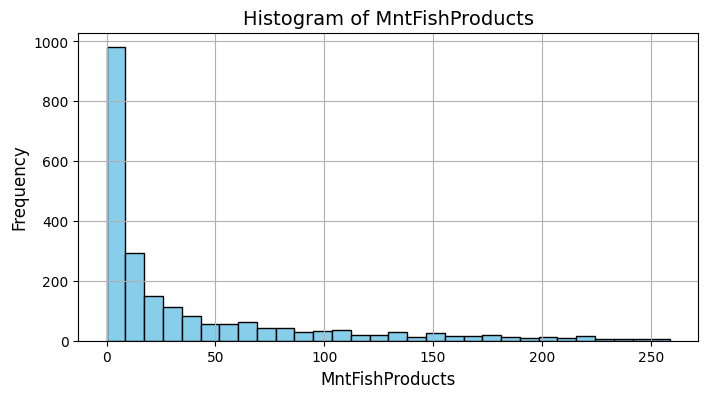

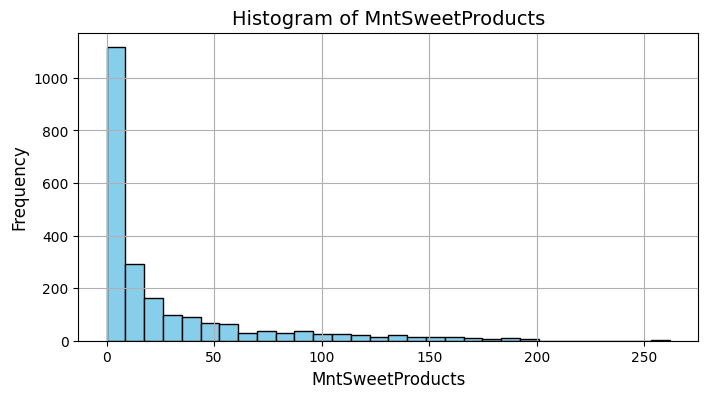

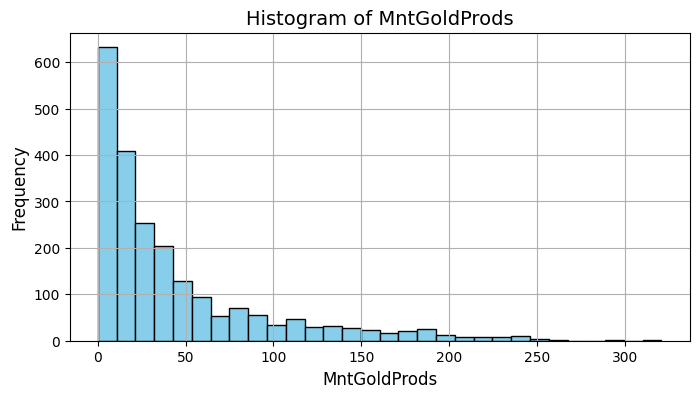

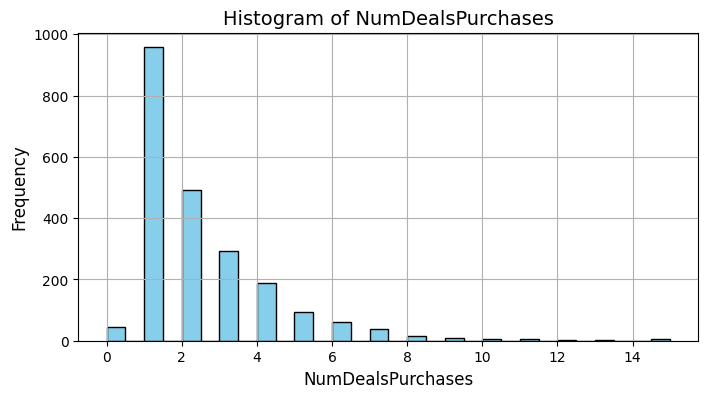

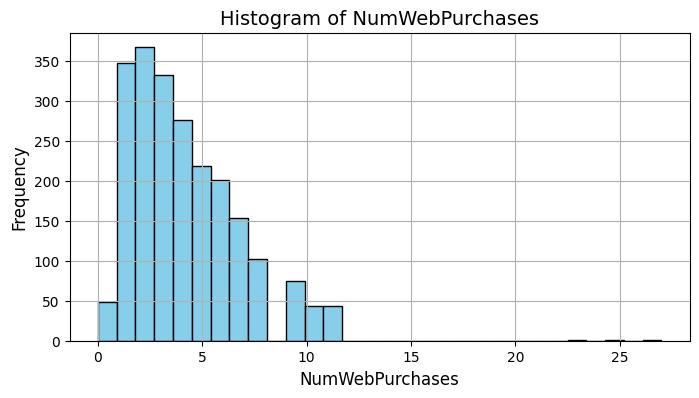

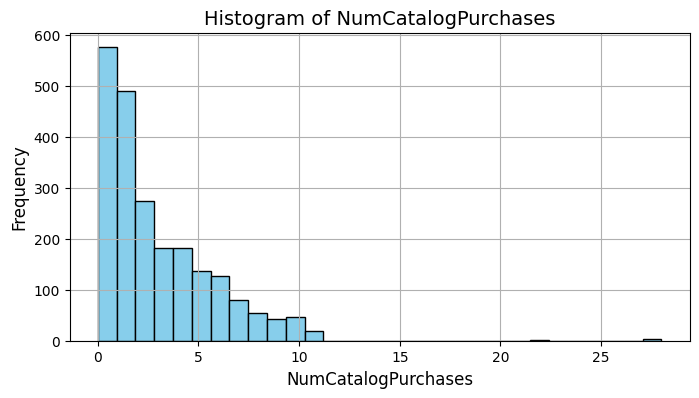

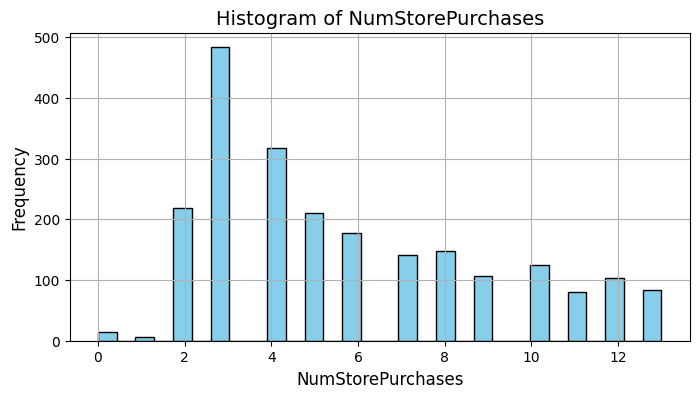

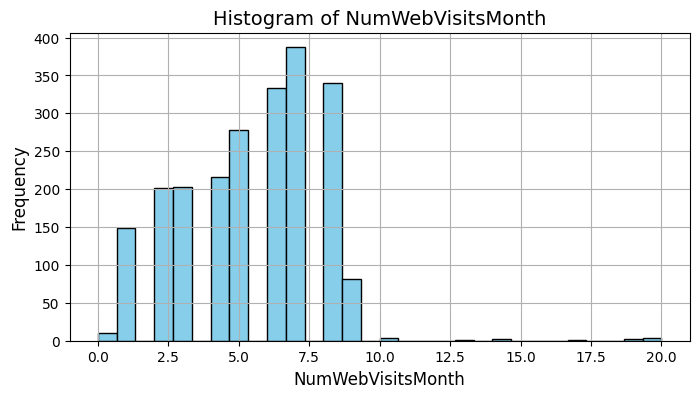

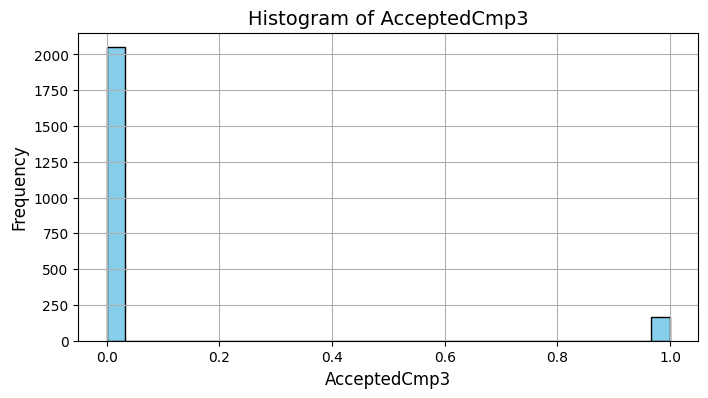

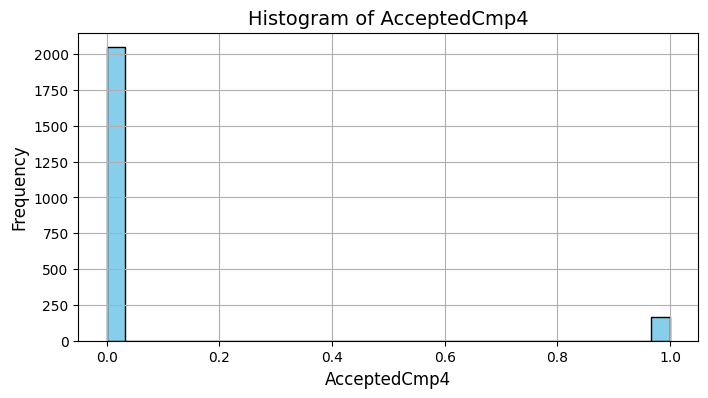

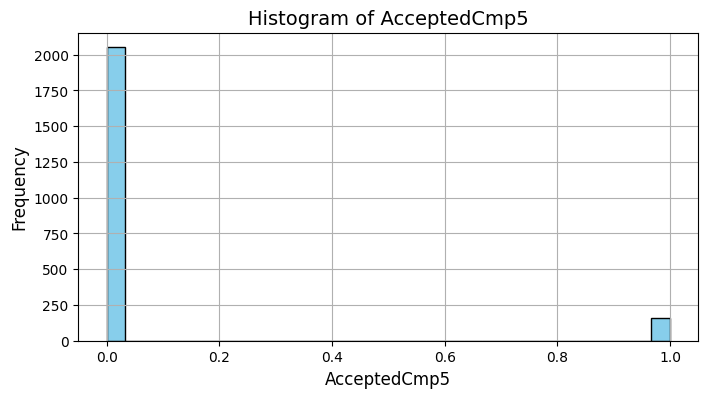

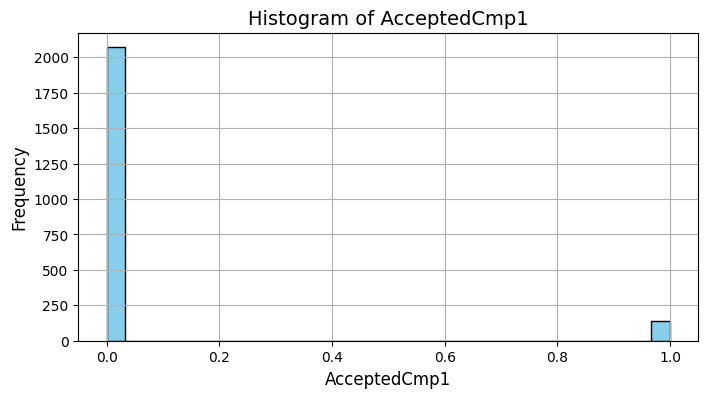

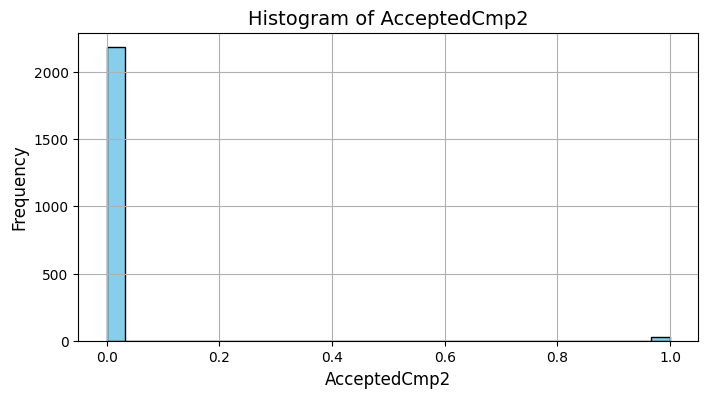

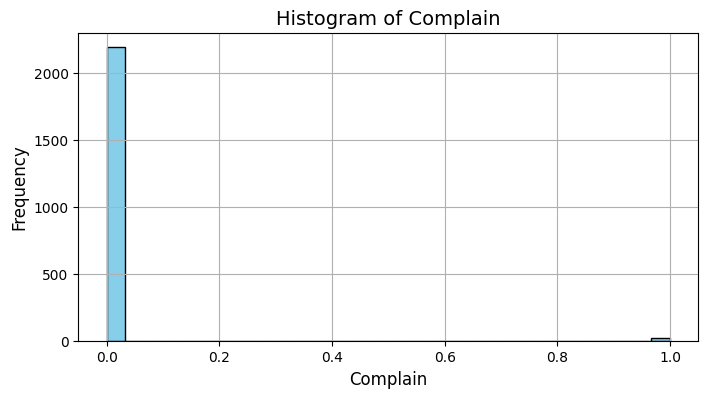

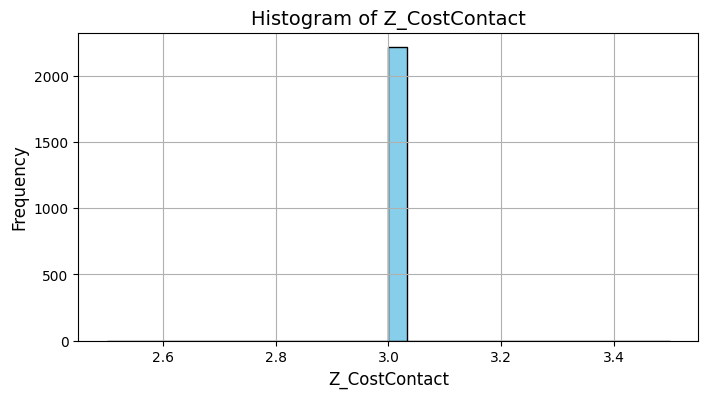

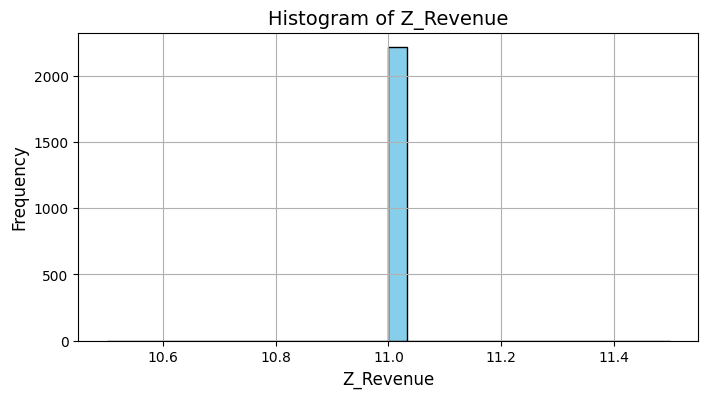

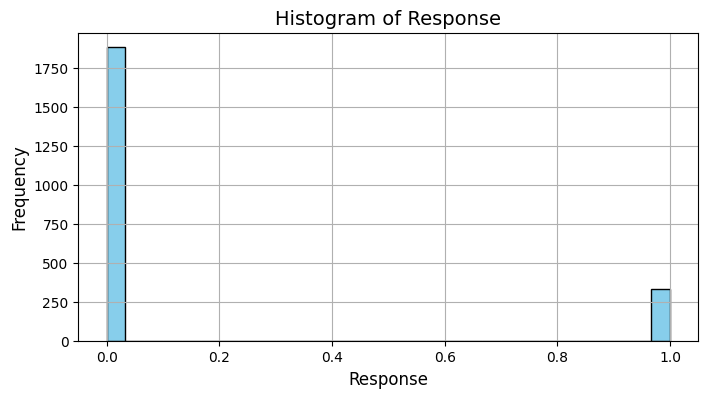

In [21]:
# Selecting only numeric features from the dataframe
numeric_features = df.select_dtypes(include=[np.number])

# Loop through each numerical feature and plot a histogram
for column in numeric_features.columns:
    plt.figure(figsize=(8, 4))
    plt.hist(df[column], bins=30, color='skyblue', edgecolor='black')
    plt.title(f'Histogram of {column}', fontsize=14)
    plt.xlabel(column, fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.grid(True)
    plt.show()

### Interpretation:
- Most individuals were born between 1955 and 1980, indicating a concentration of middle-aged participants.
- The majority of individuals have incomes between 30,000 and 60,000, with a long tail indicating a few high-income outliers.
- Most participants have 0 or 1 child/teen at home, with very few having more than 1.
- Engagement (days since last interaction) is evenly spread across the 0-100 range, indicating no clear trend in recent activity.
- Wines are the most purchased product, with a long-tailed distribution.
Purchases of Fruits, Fish, Meat, and Sweet Products show similarly skewed distributions, with most participants making small purchases and a few making large ones.
- Gold purchases are low in volume, with a long tail indicating a few participants buying larger quantities.
- Majority of participants engage in 1 to 3 deal purchases, with very few going beyond 6.
- Web purchases are moderate, with a peak around 5-7 purchases, tapering off sharply beyond that.
- Most participants made fewer than 5 catalog purchases, showing a skewed distribution.
- Store purchases show a more uniform spread up to 10-12 purchases, indicating consistent usage of stores.
- Web visits are concentrated around 5 to 8 visits per month, with minimal engagement above that.
- Most participants did not accept campaign offers, indicating either low interest or relevance of campaigns. Very few participants accepted the second campaign, indicating low campaign effectiveness or interest.
- Almost no complaints were registered, suggesting high satisfaction or minimal customer engagement in feedback.
- Most participants did not respond, with only a small group showing positive responses, implying room for improving engagement strategies.

### 3.2 Create a heatmap and check the correlation

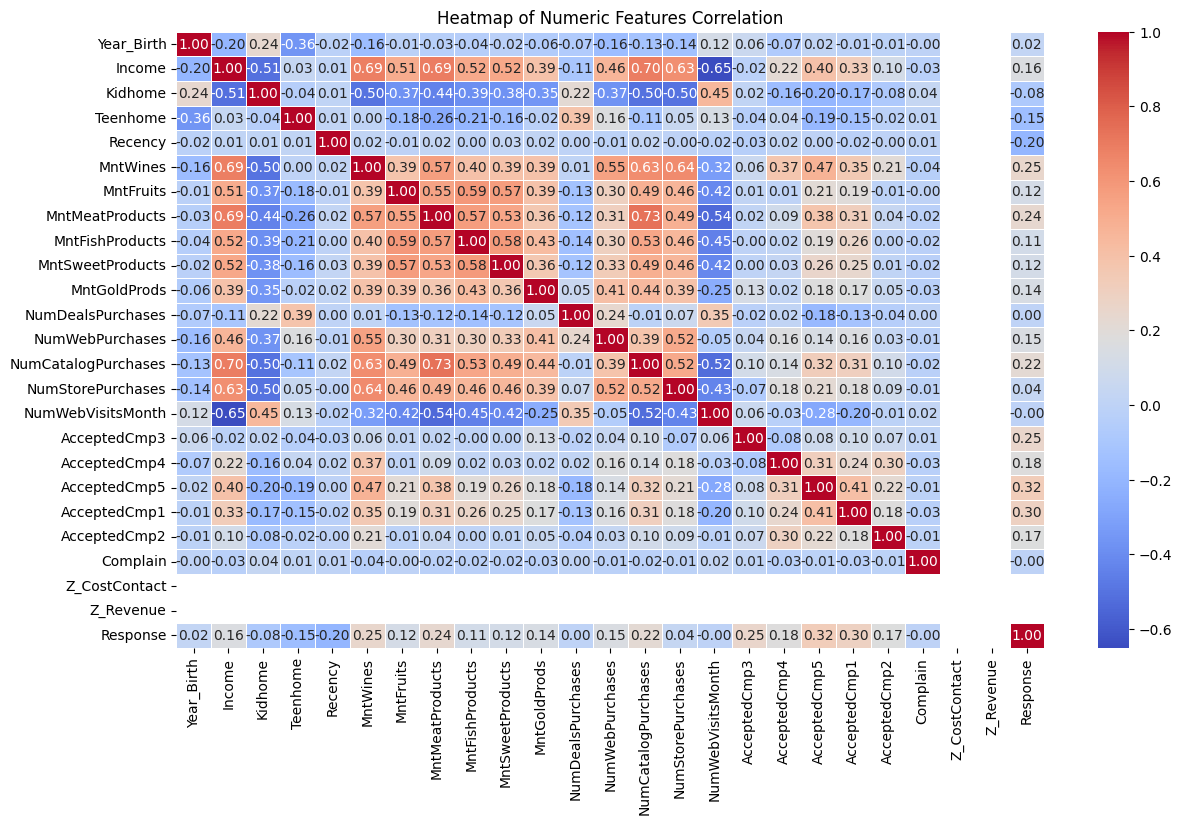

In [23]:
# Compute the correlation matrix
correlation_matrix = numeric_features.corr()

# Create the heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Heatmap of Numeric Features Correlation')
plt.show()

### Interpretation:
- `MntMeatProducts`, `MntFishProducts`, and `MntWines` are highly correlated , indicating customers who spend on one tend to spend on others.
- `Income` shows a positive correlation with product spending like `MntWines` and `MntMeatProducts`.
- `NumCatalogPurchases` correlates well with `MntWines` and `MntMeatProducts`, indicating catalog shoppers often purchase these items.
- Campaigns (`AcceptedCmp1` to `AcceptedCmp5`) are not strongly correlated with any product spending, indicating minimal impact or relevance.
- Variables like `Complain`, `Z_CostContact`, and `Recency` show very weak correlations, indicating limited influence on spending behavior.

### 3.3 Create the Bar plots for the `Education` and `Martial_status` columns

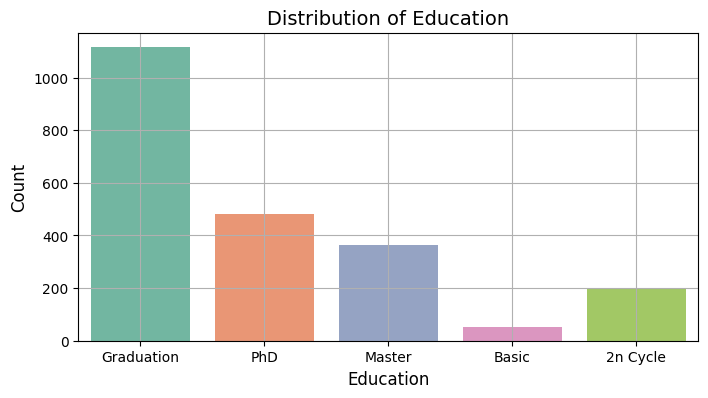

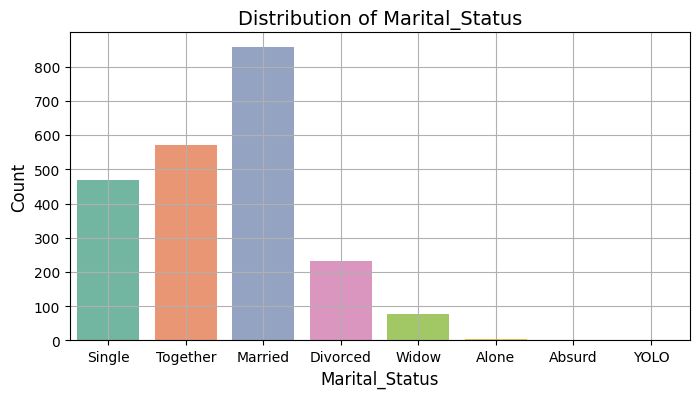

In [24]:
# List of categorical features
categorical_features = ['Education', 'Marital_Status']

# Loop through each categorical feature and plot a bar plot
for column in categorical_features:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df, x=column, palette='Set2')
    plt.title(f'Distribution of {column}', fontsize=14)
    plt.xlabel(column, fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.grid(True)
    plt.show()

### Interpretation:
- Graduation is the most common education level, followed by PhD and Master's degrees.
- Married individuals dominate the dataset, followed by those living together and single.Divorced and widowed individuals form smaller groups. A few unusual categories like “Alone,” “Absurd,” and “YOLO” suggest either erroneous data entries or rare cases.




There are only two columns(Education, Marital_Status) with object data type. So let's encode them to numerical values.

# Step 4: Data Preprocessing

### 4.1 Encode the categorical columns

In [25]:
# Import LabelEncoder for sklearn
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode 'Education' column
df['Education'] = label_encoder.fit_transform(df['Education'])

# Encode 'Marital_Status' column
df['Marital_Status'] = label_encoder.fit_transform(df['Marital_Status'])

### 4.2 Standardize the data (PCA works best on standardized data)

In [26]:
# Standardizing the data using StandardScaler

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

### 4.3 View the data

In [27]:
# Display the scaled data

print(df_scaled)

[[-1.01835202 -0.35254334  0.25476002 ...  0.          0.
   2.37542473]
 [-1.27478522 -0.35254334  0.25476002 ...  0.          0.
  -0.42097735]
 [-0.33453017 -0.35254334  1.18314414 ...  0.          0.
  -0.42097735]
 ...
 [ 1.03311355 -0.35254334 -1.60200822 ...  0.          0.
  -0.42097735]
 [-1.10382975  0.53868622  1.18314414 ...  0.          0.
  -0.42097735]
 [-1.27478522  1.42991579 -0.6736241  ...  0.          0.
   2.37542473]]


## 4.4 Principal Component Analysis(PCA)

### Reasons to Perform Principal Component Analysis (PCA)

1. **Dimensionality Reduction:**

  PCA reduces the dataset's dimensions by transforming it into fewer uncorrelated variables (principal components) while retaining most of the original variance. This is crucial for simplifying analysis and speeding up computational processes for downstream tasks, such as clustering or classification.

2. **Handling Multicollinearity:**

  Features like `AcceptedCmp1`, `AcceptedCmp2`, `AcceptedCmp3`, `AcceptedCmp4`, and `AcceptedCmp5` may be highly correlated. PCA addresses this by combining these correlated features into a smaller number of principal components, eliminating multicollinearity and making models more robust.

3. **Data Visualization:**

  By reducing the data to 2 or 3 principal components, PCA allows for effective visual exploration of high-dimensional data, revealing relationships and clusters. For instance, visualizing interactions between Income and MntWines can uncover distinct customer segments.

4. **Noise Reduction:**

  PCA captures significant patterns while filtering out noise from less important features like `Complain` or `Teenhome`, enhancing the signal-to-noise ratio in the dataset and helping models focus on critical structures.

5. **Feature Interactions and Latent Structure:**

  PCA can uncover latent structures or interactions among features, such as how combinations of `Income`, `Recency`, and `MntWines` influence customer purchasing behavior. This understanding can reveal key drivers behind customer responses.

6. **Preprocessing for Clustering or Classification:**

  Before applying clustering techniques like K-means, PCA ensures that the input features are uncorrelated and highlights the most relevant patterns, improving clustering results.

### 4.4.1 Compute the Covariance Matrix:
Calculate the covariance matrix to understand how the variables relate to each other.

In [28]:
# Compute the covariance matrix
covariance_matrix = np.cov(df_scaled.T)

# View the covariance matrix
covariance_matrix

array([[ 1.00045228e+00, -1.83867922e-01, -6.04920392e-02,
        -2.00067093e-01,  2.37604375e-01, -3.62095459e-01,
        -1.57014392e-02, -1.64689095e-01, -1.34530241e-02,
        -3.36371442e-02, -4.11724661e-02, -2.15258323e-02,
        -5.98062619e-02, -6.61861105e-02, -1.62338792e-01,
        -1.25913067e-01, -1.39060455e-01,  1.20336753e-01,
         6.11241838e-02, -7.00662552e-02,  1.90340232e-02,
        -1.19464222e-02, -7.82447248e-03, -4.60421679e-03,
         0.00000000e+00,  0.00000000e+00,  2.09466068e-02],
       [-1.83867922e-01,  1.00045228e+00,  4.15788326e-03,
         1.44951505e-01, -4.46550103e-02,  1.21014501e-01,
        -1.05173440e-02,  1.95978335e-01, -8.59877944e-02,
         3.74943502e-02, -1.17104421e-01, -1.09507924e-01,
        -1.01156666e-01,  2.55547559e-02,  8.08457563e-02,
         6.70402757e-02,  6.60160838e-02, -4.04327460e-02,
         5.43412051e-03,  5.86579581e-02,  2.99672219e-02,
        -1.01485536e-02,  2.13729591e-02, -4.22070854e-

### 4.4.2 Compute Eigenvalues and Eigenvectors:
Find the eigenvalues and eigenvectors of the covariance matrix.

In [30]:
# Compute the eigenvalues, eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)
print("Eigen values:\n",eigenvalues)
print("Eigen vectors:\n",eigenvectors)

Eigen values:
 [6.73079467 2.10799215 1.92754186 1.45467269 1.17583908 0.94963993
 1.02157365 0.99644923 1.00631887 0.83176941 0.16196278 0.20216786
 0.23498891 0.73923849 0.3114638  0.37472013 0.38948608 0.41853662
 0.424669   0.68538821 0.51308408 0.5351777  0.63157321 0.57543285
 0.61082586 0.         0.        ]
Eigen vectors:
 [[-6.03827876e-02  3.57422074e-01 -9.06672152e-02  2.69453356e-01
   2.59480534e-01 -2.93326158e-01 -2.36219360e-01 -1.86157858e-02
   7.28889735e-03 -3.81509808e-01  5.83193885e-03 -4.85421025e-03
   2.92893853e-02 -6.90031706e-02 -3.16151680e-03  9.34338623e-02
   7.95937944e-02  8.21924881e-02  1.08923066e-01 -3.59240413e-01
   4.68446471e-01 -9.41193778e-02 -1.89134539e-01 -1.25226080e-02
   1.91221739e-03  0.00000000e+00  0.00000000e+00]
 [ 2.02982971e-02 -2.41870975e-01 -1.26614499e-01 -2.77917990e-01
  -4.61258077e-01 -4.29887308e-01 -1.96652109e-01  9.37957660e-03
   2.06743223e-01 -2.33265896e-01 -6.72276045e-04  7.74265497e-02
  -3.53700487e-02  1.

### 4.4.3 Sort Eigenvalues and Select Principal Components:
Sort the eigenvalues in descending order and select the top k eigenvectors corresponding to the largest eigenvalues.

In [31]:
# Sort the eigenvalues in descending order and get the corresponding indices
sorted_index = np.argsort(eigenvalues)[::-1]

# Sort the eigenvectors based on the indices of sorted eigenvalues
# This ensures the eigenvectors are ordered by their corresponding eigenvalues from largest to smallest
eigenvectors_sorted = eigenvectors[:, sorted_index]

# Display the sorted eigenvectors
eigenvectors_sorted


array([[-6.03827876e-02,  3.57422074e-01, -9.06672152e-02,
         2.69453356e-01,  2.59480534e-01, -2.36219360e-01,
         7.28889735e-03, -1.86157858e-02, -2.93326158e-01,
        -3.81509808e-01, -6.90031706e-02, -3.59240413e-01,
        -1.89134539e-01,  1.91221739e-03, -1.25226080e-02,
        -9.41193778e-02,  4.68446471e-01,  1.08923066e-01,
         8.21924881e-02,  7.95937944e-02,  9.34338623e-02,
        -3.16151680e-03,  2.92893853e-02, -4.85421025e-03,
         5.83193885e-03,  0.00000000e+00,  0.00000000e+00],
       [ 2.02982971e-02, -2.41870975e-01, -1.26614499e-01,
        -2.77917990e-01, -4.61258077e-01, -1.96652109e-01,
         2.06743223e-01,  9.37957660e-03, -4.29887308e-01,
        -2.33265896e-01,  1.34004302e-02,  2.86630455e-01,
        -2.51655432e-01, -7.75350910e-02,  7.67069461e-02,
        -3.04029562e-01,  4.90232476e-02,  1.76459542e-01,
         4.01522295e-02, -1.18288473e-01,  2.46238500e-02,
         8.56966501e-02, -3.53700487e-02,  7.74265497e-

### 4.4.4 Calculate the explained variance ratio for each principal component.

In [32]:
# Calculate total variance (sum of eigenvalues)
total_variance = np.sum(eigenvalues)

# Calculate explained variance ratio for the first 10 components
explained_variance_ratio = eigenvalues / total_variance

# Print explained variance ratio for each component
print("Explained variance ratio : ", explained_variance_ratio)

Explained variance ratio :  [0.26911007 0.08428157 0.07706682 0.0581606  0.0470123  0.03796842
 0.04084447 0.03983995 0.04023456 0.03325574 0.00647558 0.00808306
 0.00939531 0.02955617 0.01245292 0.01498203 0.0155724  0.0167339
 0.01697908 0.02740313 0.02051409 0.02139743 0.02525151 0.02300691
 0.02442199 0.         0.        ]


### 4.4.5 Calculate Cumulative Explained Variance
Understand how much cumulative variance is explained by the principal components.

In [33]:
# Calculate cumulative explained variance
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

# Print cumulative explained variance
print("Cumulative explained variance: ", cumulative_explained_variance)

Cumulative explained variance:  [0.26911007 0.35339164 0.43045846 0.48861906 0.53563136 0.57359979
 0.61444426 0.65428421 0.69451877 0.7277745  0.73425008 0.74233314
 0.75172845 0.78128462 0.79373754 0.80871957 0.82429197 0.84102587
 0.85800495 0.88540808 0.90592217 0.9273196  0.9525711  0.97557801
 1.         1.         1.        ]


### 4.4.6 Plot "cumulative explained variance" vs "number of components"

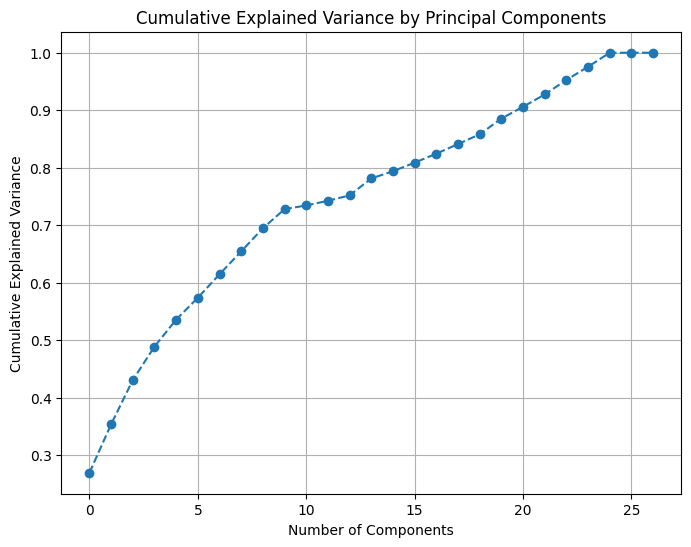

In [34]:
# Plot the cumulative explained variance
plt.figure(figsize=(8,6))
plt.plot(cumulative_explained_variance, marker='o', linestyle='--')
plt.title('Cumulative Explained Variance by Principal Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()

### Interpretation:
- With just 10 components, the explained variance is greater than 70%.

### 4.4.7 Alternate Way of using PCA:
Perform PCA using sklearn directly, which simplifies the process and includes built-in methods to calculate explained variance and visualize it.

In [37]:
# Import the required library
from sklearn.decomposition import PCA

# Steps remain the same till scaling the features
# Aplly pCA on scaled data
# Apply PCA, specify the number of components or leave empty for full decomposition
pca = PCA(n_components=18)  # Adjust the number of components if needed
X_pca = pca.fit_transform(df_scaled)

# Explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Print explained variance for each component
print("Explained variance ratio by each component: ", explained_variance_ratio)

Explained variance ratio by each component:  [0.26911007 0.08428157 0.07706682 0.0581606  0.0470123  0.04084447
 0.04023456 0.03983995 0.03796842 0.03325574 0.02955617 0.02740313
 0.02525151 0.02442199 0.02300691 0.02139743 0.02051409 0.01697908]


**Interpretation:**
* The explained variance ratio shows how much of the total variance in the dataset is explained by each principal component (PC).
* The first component explains 26.91% of the total variance, which means it captures the most significant variability in the data.
* The second component explains 8.43%, followed by 7.71% for the third component, and so on.
* As we move to higher components, each subsequent component explains a smaller portion of the variance. For instance, the fifth component explains 4.7%, and the 18th component explains about 1.7%.

## 4.5 Matrix Factorization: SVD - Singular Value Decomposition

## Reasons to Perform SVD

1. **Dimensionality Reduction:**

  SVD decomposes the data matrix into three matrices (U, Σ, and V). By retaining only the top singular values, SVD effectively reduces dimensionality, making it easier to analyze and visualize data.

2. **Handling Multicollinearity:**

  SVD transforms the data into a lower-dimensional space where correlations are minimized, effectively mitigating multicollinearity among features.

3. **Data Visualization:**

  SVD projects high-dimensional data into a lower-dimensional space, enabling visualization of the directions of maximum variance and helping to reveal insights in the data structure.

4. **Noise Reduction:**

  SVD allows the discarding of singular values that contribute little to the overall structure of the data, effectively reducing noise and improving the overall quality of the dataset.

5. **Feature Interactions and Latent Structure:**

  SVD uncovers underlying relationships and latent factors in the data, helping to understand how various features interact to influence customer behavior.

6. **Preprocessing for Clustering or Classification:**

  SVD serves as a powerful preprocessing tool, particularly beneficial in recommendation systems, where it reduces dimensionality while preserving essential data structure, enhancing the performance of machine learning algorithms.

### 4.5.1 Perform SVD manaullay by calculation U, Sigma, Vt

In [38]:
# Import the library svd
from numpy.linalg import svd

# Perform Singular Value Decomposition
U, Sigma, Vt = svd(df_scaled)

# Check the shapes of the decomposed matrices
print("Shape of U: ", U.shape)
print("Shape of Sigma: ", Sigma.shape)
print("Shape of Vt: ", Vt.shape)

# Print the first few singular values (diagonal of Sigma matrix)
print("Singular Values: ", Sigma[:10])

Shape of U:  (2212, 2212)
Shape of Sigma:  (27,)
Shape of Vt:  (27, 27)
Singular Values:  [121.9909301   68.269837    65.28242527  56.71226778  50.98803985
  47.52577545  47.16959845  46.93771664  45.8219803   42.88405486]


### 4.5.2 Calculate Explained Variance Using SVD

In [42]:
# Calculate the explained variance (similar to PCA's explained variance)
explained_variance = (Sigma**2) / np.sum(Sigma**2)

# Calculate cumulative explained variance
cumulative_explained_variance = np.cumsum(explained_variance)

# Print the explained variance for the first few components
print("Explained variance by component: ", explained_variance)

# Print cumulative explained variance
print("Cumulative explained variance: ", cumulative_explained_variance)


Explained variance by component:  [2.69110073e-01 8.42815668e-02 7.70668182e-02 5.81606025e-02
 4.70123003e-02 4.08444725e-02 4.02345573e-02 3.98399502e-02
 3.79684246e-02 3.32557353e-02 2.95561718e-02 2.74031344e-02
 2.52515074e-02 2.44219886e-02 2.30069083e-02 2.13974301e-02
 2.05140851e-02 1.69790805e-02 1.67338964e-02 1.55724002e-02
 1.49820291e-02 1.24529199e-02 9.39530708e-03 8.08305843e-03
 6.47558227e-03 1.15226563e-33 1.15226563e-33]
Cumulative explained variance:  [0.26911007 0.35339164 0.43045846 0.48861906 0.53563136 0.57647583
 0.61671039 0.65655034 0.69451877 0.7277745  0.75733067 0.78473381
 0.80998531 0.8344073  0.85741421 0.87881164 0.89932573 0.91630481
 0.9330387  0.9486111  0.96359313 0.97604605 0.98544136 0.99352442
 1.         1.         1.        ]


### 4.5.3 Plot "cumulative explained variance" vs "number of components"

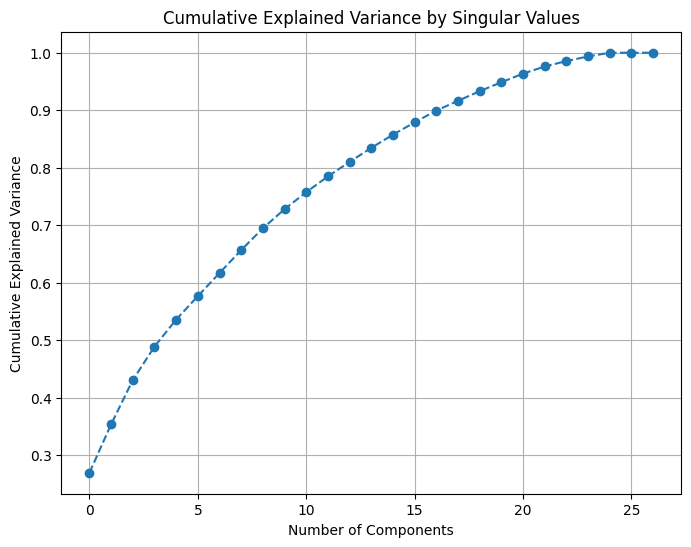

In [40]:
# Plot the cumulative explained variance
plt.figure(figsize=(8,6))
plt.plot(cumulative_explained_variance, marker='o', linestyle='--')
plt.title('Cumulative Explained Variance by Singular Values')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()


### Interpretation:
- We get the same results in SVD as well.

### 4.5.4 Perform SVD using `sklearn`

In [41]:
# Import the library
from sklearn.decomposition import TruncatedSVD

# Apply Truncated SVD (specify the number of components to retain)
svd = TruncatedSVD(n_components=18)  # Choose number of components
X_svd = svd.fit_transform(df_scaled)

# Get the explained variance ratio
explained_variance_ratio = svd.explained_variance_ratio_

# Print explained variance ratio for each component
print("Explained variance ratio: ", explained_variance_ratio)


Explained variance ratio:  [0.26911007 0.08428157 0.07706682 0.0581606  0.0470123  0.04084447
 0.04023456 0.03983995 0.03796842 0.03325574 0.02955617 0.02740313
 0.02525151 0.02442199 0.02300691 0.02139743 0.02051409 0.01697908]


**Interpretation:**
* The explained variance ratio indicates the proportion of the total variance in the data explained by each singular value (or component) after applying SVD.
* The first component explains approximately 26.9% of the total variance, meaning it captures the largest portion of variability in the data.
* The second component explains 8.4% of the variance, followed by 7.7% for the third, and so on.
* The variance explained decreases gradually as we move to the higher components, which indicate diminishing returns on the amount of variance captured by each subsequent component.
* The cumulative explained variance can be summed up from these values to assess how many components are needed to capture a significant amount of the data's structure.
* For example, the first six components account for a significant portion of the variance (about 57.7%), and by the time we reach the 18th component, almost the entire structure (above 90%) is captured.
* This suggests that dimensionality reduction using SVD can effectively reduce the dataset's complexity while preserving most of the critical information using fewer components (e.g., 18 instead of the original number of features).

## Final Conclusion: Comparing PCA and SVD

PCA and SVD are both effective methods for dimensionality reduction, but their application and interpretation slightly differ.

1. PCA Results:

  * PCA's explained variance ratio indicates that 21 components are sufficient to retain over 90% of the variance.
  * PCA is particularly suited when the goal is to maximize variance and ensure components are uncorrelated.

2. SVD Results:

  * SVD also retains a large portion of the data's structure, but its focus is more on decomposing the data matrix into singular values.
  * Like PCA, SVD helps in reducing the dimensionality, but is often more efficient for sparse matrices or text data (e.g., in NLP tasks).
  * SVD gets 90% variance in 18 components

3. Efficiency:

  * PCA is more intuitive for variance-based reduction and visual analysis of feature importance.
  * SVD can handle large-scale, sparse data and is frequently used in recommendation systems and latent semantic analysis.

4. Conclusion:

  If your primary objective is capturing variance in your dataset and focusing on feature interpretability, PCA is the preferred method.
  For more generalized matrix decomposition and efficiency in handling large datasets, SVD might be the better choice.